<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Содержание:" data-toc-modified-id="Содержание:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><a name="0" rel="nofollow">Содержание:</a></a></span></li><li><span><a href="#1.-Описание-задачи." data-toc-modified-id="1.-Описание-задачи.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><a name="1" rel="nofollow">1. Описание задачи.</a></a></span></li><li><span><a href="#2.-Очистка-и-форматирование-данных." data-toc-modified-id="2.-Очистка-и-форматирование-данных.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><a name="2" rel="nofollow">2. Очистка и форматирование данных.</a></a></span></li><li><span><a href="#3.-Разведочный-анализ-данных." data-toc-modified-id="3.-Разведочный-анализ-данных.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><a name="3" rel="nofollow">3. Разведочный анализ данных.</a></a></span></li><li><span><a href="#4.-Конструирование-и-выбор-признаков" data-toc-modified-id="4.-Конструирование-и-выбор-признаков-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><a name="4" rel="nofollow">4. Конструирование и выбор признаков</a></a></span></li><li><span><a href="#5.-Сравнение-и-выбор-модели-машинного-обучения." data-toc-modified-id="5.-Сравнение-и-выбор-модели-машинного-обучения.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><a name="5" rel="nofollow">5. Сравнение и выбор модели машинного обучения.</a></a></span></li><li><span><a href="#6.-Гиперпараметрическая-оптимизация-модели" data-toc-modified-id="6.-Гиперпараметрическая-оптимизация-модели-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><a name="6" rel="nofollow">6. Гиперпараметрическая оптимизация модели</a></a></span></li><li><span><a href="#7.-Оценка-модели-на-тестовом-наборе-данных." data-toc-modified-id="7.-Оценка-модели-на-тестовом-наборе-данных.-8"><span class="toc-item-num">8&nbsp;&nbsp;</span><a name="7" rel="nofollow">7. Оценка модели на тестовом наборе данных.</a></a></span></li><li><span><a href="#8.-Интерпретирование-результатов-работы-модели" data-toc-modified-id="8.-Интерпретирование-результатов-работы-модели-9"><span class="toc-item-num">9&nbsp;&nbsp;</span><a name="8" rel="nofollow">8. Интерпретирование результатов работы модели</a></a></span></li><li><span><a href="#9.-Выводы" data-toc-modified-id="9.-Выводы-10"><span class="toc-item-num">10&nbsp;&nbsp;</span><a name="9" rel="nofollow">9. Выводы</a></a></span></li></ul></div>

## <a name="0">Содержание:


1.  <a href=#1>Краткое описание задачи.</a>
2.  <a href=#2>Очистка и форматирование данных.</a>
3.  <a href=#3>Разведочный анализ данных.</a>
4.  <a href=#4>Конструирование и выбор признаков.</a>
5.  <a href=#5>Сравнение метрик нескольких моделей машинного обучения.</a>
6.  <a href=#6>Гиперпараметрическая настройка лучшей модели.</a>
7.  <a href=#7>Оценка лучшей модели на тестовом наборе данных.</a>
8.  <a href=#8>Интерпретирование результатов работы модели..</a>
9.  <a href=#9>Выводы</a>

## <a name="1">1. Описание задачи.

В данной работе представлены результаты исследования набора данных сравнительного анализа города Нью-Йорк, в котором
содержатся 60 переменных, связанных с энергопотреблением для более чем 11 000 зданий. 
Первостепенный интерес представляет показатель Energy Star Score, который используется в качестве совокупного показателя общей энергоэффективности здание. 
Energy Star Score — это процентильный показатель энергоэффективности здания, рассчитывается на основе самоотчетов об использовании энергии.

__Цель:__ использовать имеющиеся данные для построения модели, которая прогнозирует количество баллов Energy Star Score для конкретного здания, с учетом данных об энергопотреблении здания, и интерпретировать результаты для поиска факторов, влияющих на итоговый балл.

Данные уже включают в себя присвоенные баллы Energy Star Score, поэтому наша задача представляет собой машинное обучение с управляемой регрессией.

##  <a name="2">2. Очистка и форматирование данных.

Импортируем необходимые библиотеки

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV



Загрузка данных

In [2]:
# Read in data into a dataframe 
data = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

# Display top of dataframe
data.head()

Order  Property Id                                 Property Name  \
0      1        13286                                       201/205   
1      2        28400                    NYP Columbia (West Campus)   
2      3      4778226                                 MSCHoNY North   
3      4      4778267  Herbert Irving Pavilion & Millstein Hospital   
4      5      4778288                               Neuro Institute   

  Parent Property Id        Parent Property Name BBL - 10 digits  \
0              13286                     201/205      1013160001   
1              28400  NYP Columbia (West Campus)      1021380040   
2              28400  NYP Columbia (West Campus)      1021380030   
3              28400  NYP Columbia (West Campus)      1021390001   
4              28400  NYP Columbia (West Campus)      1021390085   

  NYC Borough, Block and Lot (BBL) self-reported  \
0                                     1013160001   
1                                   1-02138-0040   
2                                   1-02138-0030   
3                                   1-02139-0001   
4                                   1-02139-0085   

            NYC Building Identification Number (BIN)  \
0                                            1037549   
1  1084198; 1084387;1084385; 1084386; 1084388; 10...   
2                                            1063380   
3                                   1087281; 1076746   
4                                            1063403   

  Address 1 (self-reported)                Address 2 Postal Code  \
0  201/205  East  42nd  st.            Not Available       10017   
1          622 168th Street            Not Available       10032   
2             3975 Broadway            Not Available       10032   
3   161 Fort Washington Ave  177 Fort Washington Ave       10032   
4     710 West 168th Street            Not Available       10032   

  Street Number           Street Name    Borough  DOF Gross Floor Area  \
0           675              3 AVENUE  Manhattan              289356.0   
1           180  FT WASHINGTON AVENUE  Manhattan             3693539.0   
2          3975              BROADWAY  Manhattan              152765.0   
3           161  FT WASHINGTON AVENUE  Manhattan              891040.0   
4           193  FT WASHINGTON AVENUE  Manhattan              211400.0   

   Primary Property Type - Self Selected  \
0                                 Office   
1  Hospital (General Medical & Surgical)   
2  Hospital (General Medical & Surgical)   
3  Hospital (General Medical & Surgical)   
4  Hospital (General Medical & Surgical)   

  List of All Property Use Types at Property  \
0                                     Office   
1      Hospital (General Medical & Surgical)   
2      Hospital (General Medical & Surgical)   
3      Hospital (General Medical & Surgical)   
4      Hospital (General Medical & Surgical)   

               Largest Property Use Type  \
0                                 Office   
1  Hospital (General Medical & Surgical)   
2  Hospital (General Medical & Surgical)   
3  Hospital (General Medical & Surgical)   
4  Hospital (General Medical & Surgical)   

  Largest Property Use Type - Gross Floor Area (ft²)  \
0                                             293447   
1                                            3889181   
2                                             231342   
3                                            1305748   
4                                             179694   

  2nd Largest Property Use Type  \
0                 Not Available   
1                 Not Available   
2                 Not Available   
3                 Not Available   
4                 Not Available   

  2nd Largest Property Use - Gross Floor Area (ft²)  \
0                                     Not Available   
1                                     Not Available   
2                                     Not Available   
3                                     Not Available   
4                    

In [3]:
shape = data.shape
print("Размер строк и столбцов (rows, columns):\t {}".format(shape))


Размер строк и столбцов (rows, columns):	 (11746, 60)


In [4]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

__Форматирование данных__

Очевидно, многие признаки, являющиеся изначально числовыми (например, площади), интерпретированы как object. Анализировать их крайне сложно, так что сначала конвертируем их в числа, а именно в тип float.

Заменим значение “Not Available” в данных на «не число» ( np.nan — «not a number»), которое Python все же интерпретирует как число. Это позволит изменить тип соответствующих числовых признаков на float:

In [5]:
# Replace all occurrences of Not Available with numpy not a number
data = data.replace({'Not Available': np.nan})

# Iterate through the columns
for col in list(data.columns):
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        data[col] = data[col].astype(float)

In [6]:
# Statistics for each column
data.describe()

Order   Property Id  DOF Gross Floor Area  \
count  11746.000000  1.174600e+04          1.162800e+04   
mean    7185.759578  3.642958e+06          1.732695e+05   
std     4323.859984  1.049070e+06          3.367055e+05   
min        1.000000  7.365000e+03          5.002800e+04   
25%     3428.250000  2.747222e+06          6.524000e+04   
50%     6986.500000  3.236404e+06          9.313850e+04   
75%    11054.500000  4.409092e+06          1.596140e+05   
max    14993.000000  5.991312e+06          1.354011e+07   

       Largest Property Use Type - Gross Floor Area (ft²)  \
count                                       1.174400e+04    
mean                                        1.605524e+05    
std                                         3.095746e+05    
min                                         5.400000e+01    
25%                                         6.520100e+04    
50%                                         9.132400e+04    
75%                                         1.532550e+05    
max                                         1.421712e+07    

       2nd Largest Property Use - Gross Floor Area (ft²)  \
count                                        3741.000000   
mean                                        22778.682010   
std                                         55094.441422   
min                                             0.000000   
25%                                          4000.000000   
50%                                          8654.000000   
75%                                         20000.000000   
max                                        962428.000000   

       3rd Largest Property Use Type - Gross Floor Area (ft²)    Year Built  \
count                                        1484.000000       11746.000000   
mean                                        12016.825270        1948.738379   
std                                         27959.755486          30.576386   
min                                             0.000000        1600.000000   
25%                                          1720.750000        1927.000000   
50%                                          5000.000000        1941.000000   
75%                                         12000.000000        1966.000000   
max                                        591640.000000        2019.000000   

       Number of Buildings - Self-reported     Occupancy  ENERGY STAR Score  \
count                         11746.000000  11746.000000        9642.000000   
mean                              1.289971     98.762557          59.854594   
std                               4.017484      7.501603          29.993586   
min                               0.000000      0.000000           1.000000   
25%                               1.000000    100.000000          37.000000   
50%                               1.000000    100.000000          65.000000   
75%                               1.000000    100.000000          85.000000   
max                             161.000000    100.000000         100.000000   

       Site EUI (kBtu/ft²)  Weather Normalized Site EUI (kBtu/ft²)  \
count         11583.000000                            10281.000000   
mean            280.071484                              309.747466   
std            8607.178877                             9784.731207   
min               0.000000                                0.000000   
25%              61.800000                               65.100000   
50%              78.500000                               82.500000   
75%              97.600000                              102.500000   
max          869265.000000                           939329.000000   

       Weather Normalized Site Electricity Intensity (kWh/ft²)  \
count                                       10959.000000         
mean                                           11.072643         
std                                           127.733868         
min                                             0.000000         
25%   

__Пропущенные данные__

Пропуски нужно либо заполнить, либо исключить из набора полностью. Для начала попробуем оценить процент пропущенных значений в каждом столбце. Пропущенные значения допустимы, когда мы проводим исследовательский анализ данных, но их необходимо заполнить для методов машинного обучения.

Ниже приведена функция, которая вычисляет количество пропущенных значений и процент от общего числа пропущенных значений для каждого столбца.

In [7]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

__Обработка пропущенных значений__



In [8]:
missing_values_table(data)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


Missing Values  \
Fuel Oil #1 Use (kBtu)                                       11737   
Diesel #2 Use (kBtu)                                         11730   
Address 2                                                    11539   
Fuel Oil #5 & 6 Use (kBtu)                                   11152   
District Steam Use (kBtu)                                    10810   
Fuel Oil #4 Use (kBtu)                                       10425   
3rd Largest Property Use Type - Gross Floor Are...           10262   
3rd Largest Property Use Type                                10262   
Fuel Oil #2 Use (kBtu)                                        9165   
2nd Largest Property Use Type                                 8005   
2nd Largest Property Use - Gross Floor Area (ft²)             8005   
Metered Areas  (Water)                                        4609   
Water Intensity (All Water Sources) (gal/ft²)                 3984   
Water Use (All Water Sources) (kgal)                          3984   
Latitude                                                      2263   
Longitude                                                     2263   
Community Board                                               2263   
Council District                                              2263   
Census Tract                                                  2263   
NTA                                                           2263   
ENERGY STAR Score                                             2104   
Weather Normalized Site Natural Gas Intensity (...            1963   
Weather Normalized Site Natural Gas Use (therms)              1962   
Weather Normalized Source EUI (kBtu/ft²)                      1465   
Weather Normalized Site EUI (kBtu/ft²)                        1465   
Natural Gas Use (kBtu)                                        1442   
Weather Normalized Site Electricity Intensity (...             787   
Weather Normalized Site Electricity (kWh)                      786   
Electricity Use - Grid Purchase (kBtu)                         244   
Site EUI (kBtu/ft²)                                            163   
Source EUI (kBtu/ft²)                                          163   
NYC Building Identification Number (BIN)                       162   
Street Number                                                  124   
Street Name                                                    122   
Borough                                                        118   
DOF Gross Floor Area                                           118   
Water Required?                                                118   
Direct GHG Emissions (Metric Tons CO2e)                         83   
Total GHG Emissions (Metric Tons CO2e)                          74   
Indirect GHG Emissions (Metric Tons CO2e)                       65   
Metered Areas (Energy)                                          57   
DOF Benchmarking Submission Status                              30   
NYC Borough, Block and Lot (BBL) self-reported                  11   
BBL - 10 digits                                                 11   
Largest Property Use Type                                        2   
Largest Property Use Type - Gross Floor Area (ft²)               2   

                                                    % of Total Values  
Fuel Oil #1 Use (kBtu)                                           99.9  
Diesel #2 Use (kBtu)                                             99.9  
Address 2                                                        98.2  
Fuel Oil #5 & 6 Use (kBtu)                                       94.9  
District Steam Use (kBtu)                                        92.0  
Fuel Oil #4 Use (kBtu)                                           88.8  
3rd Largest Property Use Type - Gross Floor Are...               87.4  
3rd Largest Property Use Type                                    87.4  
Fuel Oil #2 Use (kBtu)                                           78.0  
2nd Largest Property Use Type            

Если в столбце процент пропущенных значений высокий, то он не будет полезен.

Удалим все столбцы с более чем 50% отсутствующих значений.

In [9]:
# Get the columns with > 50% missing
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.
We will remove 11 columns.


In [10]:
# Drop the columns
data = data.drop(columns = list(missing_columns))

# For older versions of pandas (https://github.com/pandas-dev/pandas/issues/19078)
# data = data.drop(list(missing_columns), axis = 1)

Остальные пропущенные значения должны быть заполнены, прежде чем приступать к машинному обучению

##  <a name="3">3. Разведочный анализ данных.
<br>

Т.к. мы должны выполнить предсказание значения целевого признака, рейтинга энергопотребления (score), так что целесообразно для начала понять, какое эта величина имеет распределение.

С помощью Графика с одной переменной (называемый одномерным) посмотрим распределение одной переменной на гистограмме.

Text(0.5, 1.0, 'Energy Star Score Distribution')

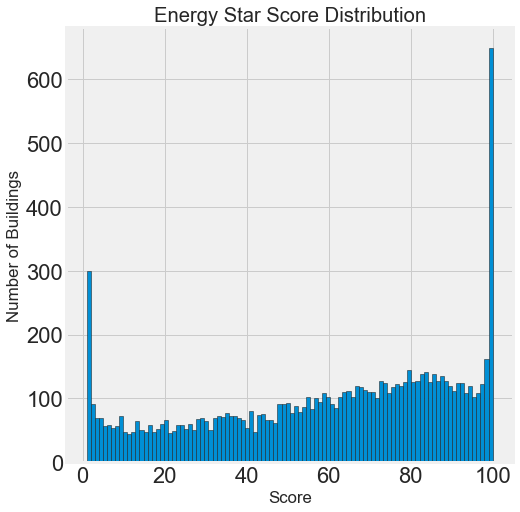

In [11]:
plt.figure(figsize=(8, 8))
# Rename the score 
data = data.rename(columns = {'ENERGY STAR Score': 'score'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Score'); plt.ylabel('Number of Buildings')
plt.title('Energy Star Score Distribution')

Интересующий нас рейтинг представляет собой перцентиль, так что ожидаемо было бы увидеть равномерное распределение, где каждому значению соответствует примерно одинаковое количество зданий. В нашем случае на лицо диспропорция, больше всего зданий имеют максимальное значение рейтинга — 100, либо минимальное — 1 (высокий рейтинг это хороший показатель).
Признак основывается на “отчетах об энергопотреблении”, предоставляемых владельцами зданий самостоятельно. В результате мы получаем не самую объективную оценку эффективности использования электроэнергии в зданиях.


В отличие от оценки Energy Star Score, показатель - интенсивность использования энергии (EUI) - основан на фактическом потреблении энергии, который представляет собой общее потребление энергии, деленное на квадратные метры здания. 


Text(0.5, 1.0, 'Site EUI Distribution')

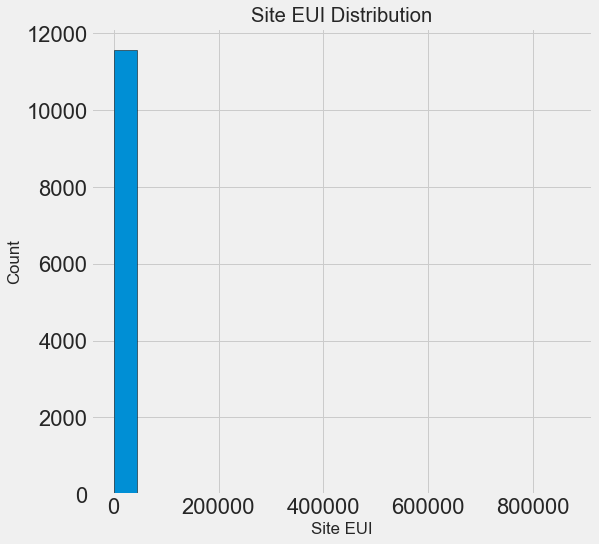

In [12]:
# Histogram Plot of Site EUI
plt.figure(figsize=(8, 8))
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI') 
plt.ylabel('Count') 
plt.title('Site EUI Distribution')

График получился искаженным из-за наличия нескольких зданий с очень высокими баллами.

Посмотрим на статистику по этой функции.

In [13]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [14]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

У одного здания показатель явно намного выше остальных.

In [15]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265, :]

Order  Property Id Property Name                   Parent Property Id  \
8068   9984      4414323  234 Skillman  Not Applicable: Standalone Property   

                     Parent Property Name BBL - 10 digits  \
8068  Not Applicable: Standalone Property      3028937502   

     NYC Borough, Block and Lot (BBL) self-reported  \
8068                                     3028937502   

     NYC Building Identification Number (BIN) Address 1 (self-reported)  \
8068                        3390250 , 3338313       234 Skillman avenue   

     Postal Code Street Number      Street Name   Borough  \
8068       11211           234  SKILLMAN AVENUE  Brooklyn   

      DOF Gross Floor Area Primary Property Type - Self Selected  \
8068               61811.0                   Multifamily Housing   

     List of All Property Use Types at Property Largest Property Use Type  \
8068                        Multifamily Housing       Multifamily Housing   

      Largest Property Use Type - Gross Floor Area (ft²)  Year Built  \
8068                                            56900.0         2004   

      Number of Buildings - Self-reported  Occupancy Metered Areas (Energy)  \
8068                                    1         90         Whole Building   

     Metered Areas  (Water)  score  Site EUI (kBtu/ft²)  \
8068                    NaN    1.0             869265.0   

      Weather Normalized Site EUI (kBtu/ft²)  \
8068                                939329.0   

      Weather Normalized Site Electricity Intensity (kWh/ft²)  \
8068                                                9.9         

      Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
8068                                             9393.0            

      Weather Normalized Source EUI (kBtu/ft²)  Natural Gas Use (kBtu)  \
8068                                  986366.0            4.945919e+10   

      Weather Normalized Site Natural Gas Use (therms)  \
8068                                       534458968.8   

      Electricity Use - Grid Purchase (kBtu)  \
8068                               1983655.6   

      Weather Normalized Site Electricity (kWh)  \
8068                                   563239.6   

      Total GHG Emissions (Metric Tons CO2e)  \
8068                               2627199.1   

      Direct GHG Emissions (Metric Tons CO2e)  \
8068                                2627015.0   

      Indirect GHG Emissions (Metric Tons CO2e)  \
8068                                      184.1   

      Property GFA - Self-Reported (ft²)  \
8068                             56900.0   

      Water Use (All Water Sources) (kgal)  \
8068                                2547.9   

      Water Intensity (All Water Sources) (gal/ft²)  Source EUI (kBtu/ft²)  \
8068                                          44.78               912801.1   

                Release Date Water Required?  \
8068  05/01/2017 11:34:14 PM             NaN   

     DOF Benchmarking Submission Status   Latitude  Longitude  \
8068                      In Compliance  40.716233  -73.94141   

      Community Board  Council District  Census Tract  \
8068              1.0              34.0         477.0   

                                                    NTA  
8068  East Williamsburg                             ...

Выбросы могут возникать по многим причинам: опечатки, неисправности измерительных приборов, неверные единицы измерения или они могут быть корректными, но экстремальными значениями. Выбросы могут испортить модель, потому что они не отражают фактическое распределение данных.
В данном случае мы удалим «лишние» значения, руководствуясь определением экстремальных аномалий:


__Удаление выбросов__

Удаляем аномальные значения полагаясь на данный критерий:
- Ниже первой квартили, минус 3 ∗ межквартильное расстояние
- Выше третьей квартили, плюс 3 ∗ межквартильное расстояние

В этом случае я уберу только единственную удаленную точку и посмотрим, как выглядит распределение.

In [16]:
# Calculate first and third quartile
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

Text(0.5, 1.0, 'Site EUI Distribution')

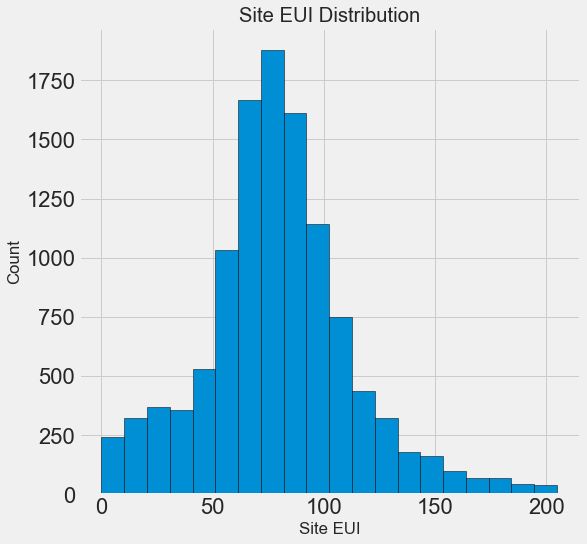

In [17]:
# Histogram Plot of Site EUI
plt.figure(figsize=(8, 8))
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black')
plt.xlabel('Site EUI')
plt.ylabel('Count'); plt.title('Site EUI Distribution')

Этот график уже близок к нормальному распределению.

__Поиск взаимосвязи__

Чтобы посмотреть на влияние категориальных переменных на оценку, мы можем сделать график плотности окрашенным значением категориальной переменной. Графики плотности также показывают распределение одной переменной и могут рассматриваться как сглаженная гистограмма. Если мы раскрасим кривые плотности категориальной переменной, это покажет нам, как распределение меняется в зависимости от класса.

Первый график, который мы сделаем, показывает распределение баллов по типу недвижимости. Чтобы не загромождать график, мы ограничим график типами построения, имеющими более 100 наблюдений в наборе данных.

In [18]:
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

Text(0.5, 1.0, 'Density Plot of Energy Star Scores by Building Type')

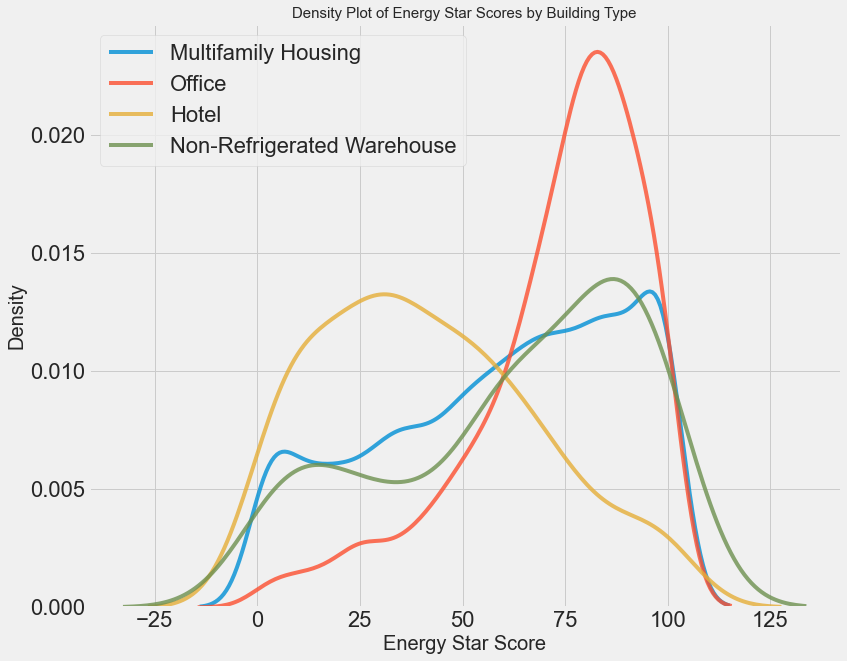

In [19]:
# Plot of distribution of scores for building categories
f, ax = plt.subplots(figsize=(12, 10))

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    

# label the plot
plt.legend() 
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20)
plt.title('Density Plot of Energy Star Scores by Building Type', size = 15)

Как видно из графика, тип здания сильно влияет на количество баллов. Офисные здания имеют более высокий балл, а отели более низкий. Значит нужно включить тип здания в модель, потому что этот признак влияет на нашу цель. В качестве категориальной переменной мы должны выполнить one-hot кодирование типа здания.

Аналогичный график можно использовать для оценки Energy Star Score по районам города:

In [20]:
# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

Text(0.5, 1.0, 'Density Plot of Energy Star Scores by Borough')

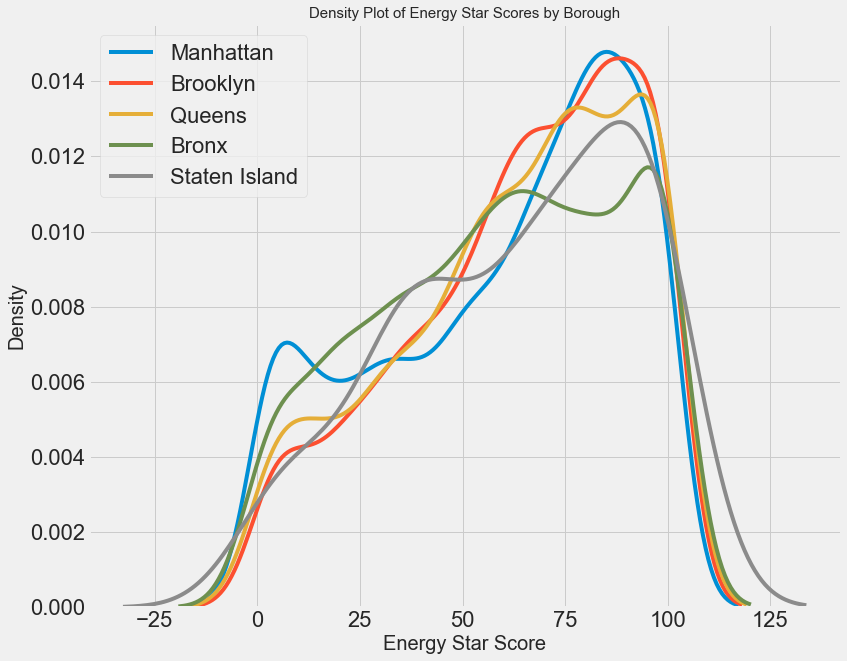

In [21]:
# Plot of distribution of scores for boroughs
f, ax = plt.subplots(figsize=(12, 10))

# Plot each borough distribution of scores
for borough in boroughs:
    # Select the building type
    subset = data[data['Borough'] == borough]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
plt.legend()    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20)
plt.title('Density Plot of Energy Star Scores by Borough', size = 15)

Район не так сильно влияет на балл, как тип здания. Тем не менее мы включим его в модель, потому что между районами существует небольшая разница.

Чтобы посчитать взаимосвязи между переменными, можно использовать коэффициент корреляции Пирсона. Это мера интенсивности и направления линейной зависимости между двумя переменными. Значение +1 означает идеально линейную положительную зависимость, а -1 означает идеально линейную отрицательную зависимость.

In [22]:
# Find all correlations and sort 
correlations_data = data.corr()['score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

Есть несколько признаков имеющих высокие отрицательные значения коэффициента Пирсона, причём наибольшие из них относятся к разным категориям EUI (они между собой слегка отличаются по способу расчета). EUI — Energy Use Intensity, интенсивность использования энергии — это количество использованной энергии, разделенное на площадь помещений в квадратных футах. 
Эта удельная величина используется для оценки энергоэффективности, и чем она меньше, тем лучше. 


В следующем коде мы берем логарифмические и квадратно-корневые преобразования числовых переменных, сразу же кодируем две выбранные категориальные переменные (тип здания и район), вычисляем корреляции между всеми функциями и оценкой и отображаем 15 положительных и 15 самых отрицательных корреляций.

In [23]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col], where=numeric_subset[col] > 0)

# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

C:\Users\TS\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [24]:
# Display most negative correlations
correlations.head(15)

Site EUI (kBtu/ft²)                                            -0.723864
Weather Normalized Site EUI (kBtu/ft²)                         -0.713993
sqrt_Site EUI (kBtu/ft²)                                       -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft²)                    -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft²)                  -0.671044
sqrt_Source EUI (kBtu/ft²)                                     -0.669396
Weather Normalized Source EUI (kBtu/ft²)                       -0.645542
Source EUI (kBtu/ft²)                                          -0.641037
log_Source EUI (kBtu/ft²)                                      -0.611071
log_Weather Normalized Source EUI (kBtu/ft²)                   -0.606632
log_Site EUI (kBtu/ft²)                                        -0.605425
log_Weather Normalized Site EUI (kBtu/ft²)                     -0.594044
log_Weather Normalized Site Electricity Intensity (kWh/ft²)    -0.427525
sqrt_Weather Normalized Site Electricity Intensity 

In [25]:
# Display most positive correlations
correlations.tail(15)

sqrt_Order                                                         0.028662
Borough_Queens                                                     0.029545
Largest Property Use Type_Supermarket/Grocery Store                0.030038
Largest Property Use Type_Residence Hall/Dormitory                 0.035407
Order                                                              0.036827
Largest Property Use Type_Hospital (General Medical & Surgical)    0.048410
Borough_Brooklyn                                                   0.050486
log_Community Board                                                0.055096
Community Board                                                    0.056612
sqrt_Community Board                                               0.058029
sqrt_Council District                                              0.060623
log_Council District                                               0.060781
Council District                                                   0.061639
Largest Prop

После преобразования функций самые сильные взаимосвязи по-прежнему связаны с интенсивностью использования энергии (EUI). Преобразования, не привели к каким-либо более сильным изменениям. Сильных положительных линейных взаимосвязей нет, хотя тип офисного здания (Largest Property Use Type_Office) слегка положительно коррелирует с оценкой. Эта переменная представляет собой представление категориальных переменных для типа здания в закодированном виде.

Мы можем использовать эти корреляции для выбора признаков. 


__График двух переменных__

Воспользуемся диаграммами рассеивания для визуализации взаимосвязей между двумя непрерывными переменными.
Ниже показана взаимосвязь Energy Star Score и EUI, цветом обозначены разные типы зданий:

Text(0.5, 1.0, 'Energy Star Score vs Site EUI')

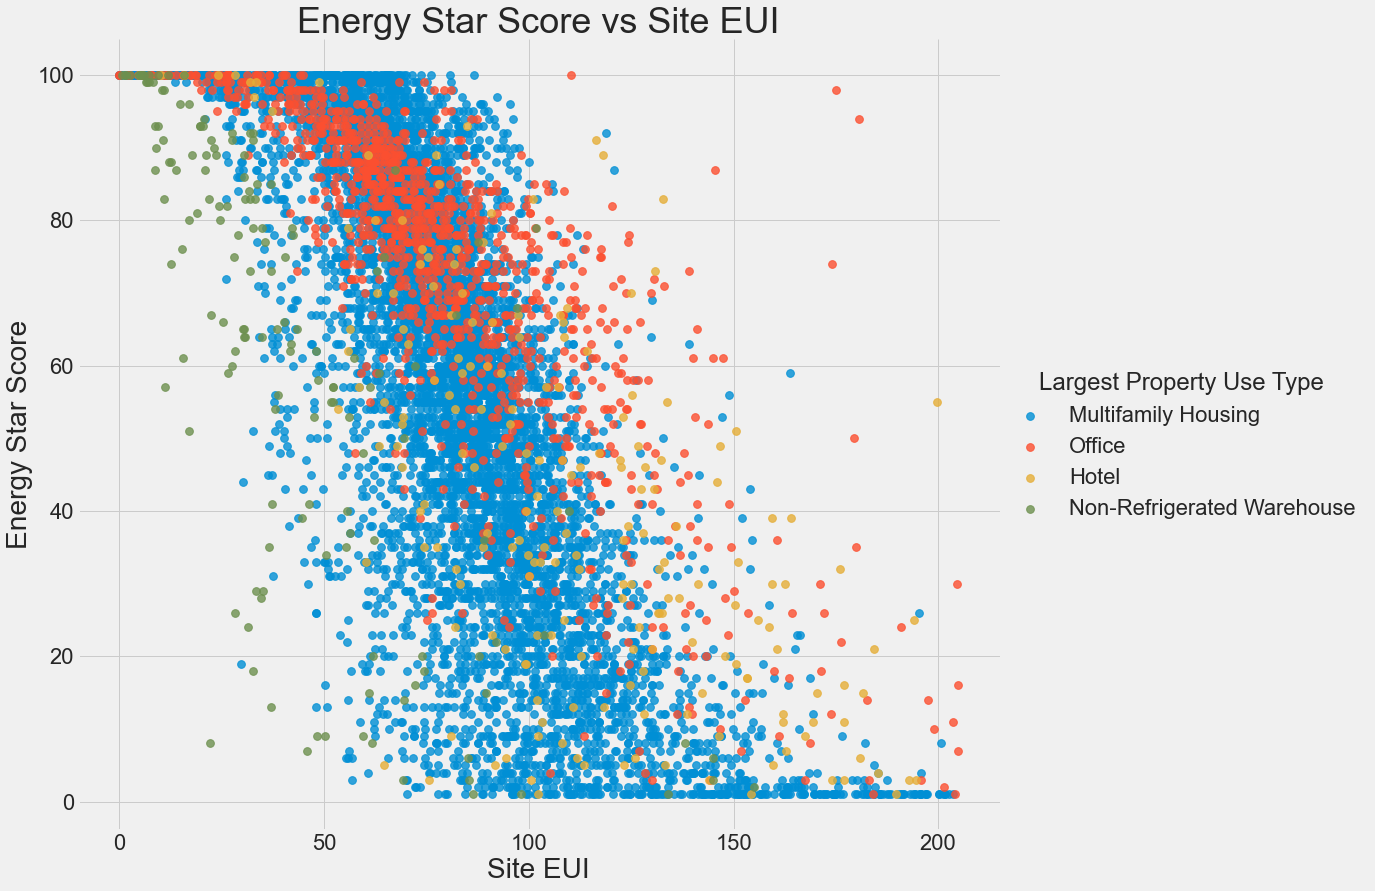

In [26]:
figsize=(12, 10)

# Extract the building types
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot(x='Site EUI (kBtu/ft²)', y='score', 
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          height = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36)


Этот график наглядно демонстрирует, что такое коэффициент корреляции со значением -0.7. Site EUI уменьшается, и рейтинг энергопотребления уверенно возрастает, независимо от типа здания.



__Pairs Plot (парный график)__

Чтобы взглянуть на взаимосвязи сразу между несколькими признаками одновременно, а так же на их распределение, построим Pairs Plot (парный график). Построен Pairs Plot со scatterplots выше главной диагонали, гистограммами на главной диагонали и 2D kernel density plots, с указанием корреляции, ниже главной диагонали.


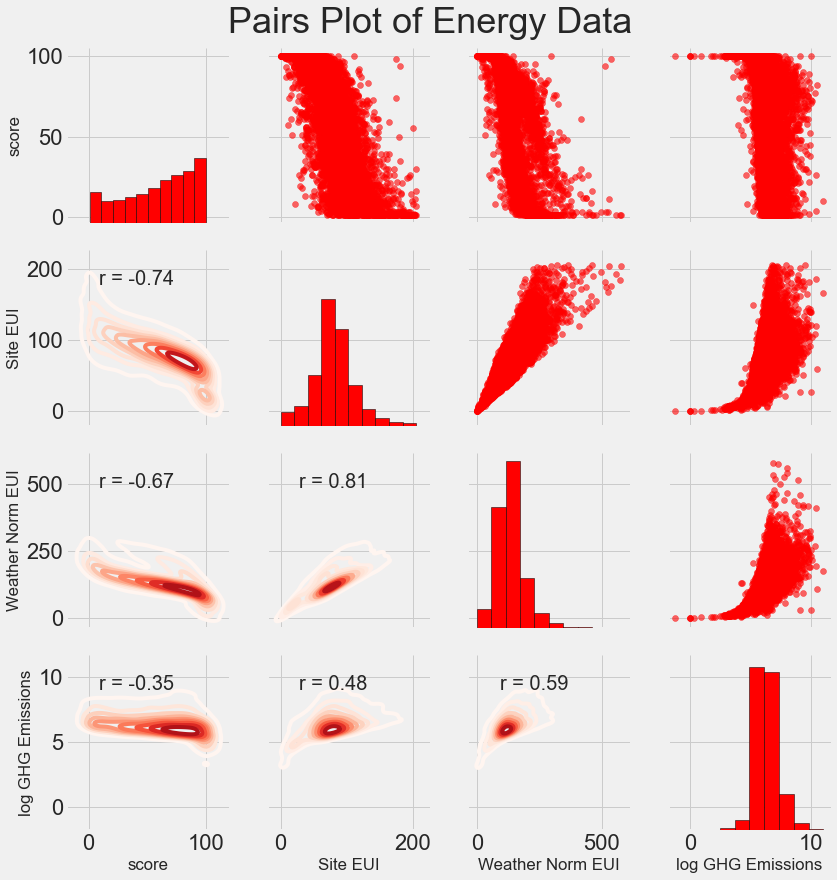

In [27]:
# Extract the columns to  plot
plot_data = features[['score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, height = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

Чтобы увидеть взаимосвязи переменных, поищем пересечения рядов и колонок. Допустим, нужно посмотоит коэффициент корреляции -0,35. 
Если мы посмотрим на верхний правый график, мы увидим диаграмму рассеяния этой зависимости.

##  <a name="4">4. Конструирование и выбор признаков

Мы сделаем следующее:

- Применим к категориальным переменным (квартал и тип собственности) one-hot кодирование.
- Добавим взятие натурального логарифма от всех числовых переменных.

One-hot кодирование необходимо для того, чтобы включить в модель категориальные переменные. Алгоритм машинного обучения не сможет понять тип «офис», так что если здание офисное, мы присвоим ему признак 1, а если не офисное, то 0.

Этот код выбирает числовые признаки, вычисляет их логарифмы, выбирает два категориальных признака, применяет к ним one-hot кодирование и объединяет оба множества в одно.

In [28]:
# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col], where=numeric_subset[col] > 0)
        
# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

(11319, 110)

В итоге в нашем наборе теперь всё ещё 11319 записей (зданий) и 110 колонок (признаков). Не все эти признаки одинаково важны для нашей задачи, так что перейдем к следующему шагу.

__Выбор признаков__

Многие из 110 признаков для нашей модели избыточны, т.к. некоторые из них сильно коррелируют. Например, зависимость Site EUI от Weather Normalized Site EUI, которая имеют коэффициент корреляции 0.997.

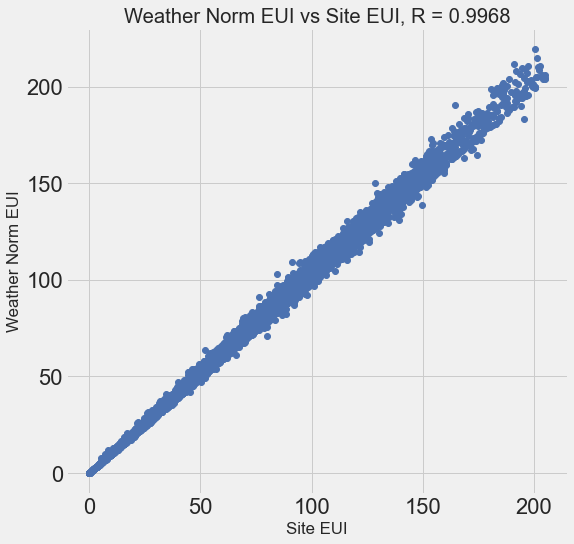

In [29]:
plt.figure(figsize=(8, 8))
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft²)'], plot_data['Weather Normalized Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI'); plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)', 'Site EUI (kBtu/ft²)']].dropna(), rowvar=False)[0][1]);


Признаки, которые сильно коррелируют друг с другом, называются коллинеарными. Удаление одной переменной в таких парах признаков часто помогает модели обобщать и быть более интерпретируемой. 

Следующий код удаляет коллинеарные признаки на основе порога, который мы выбираем для коэффициентов корреляции, удаляя один из двух сравниваемых признаков. Мы будем использовать порог 0,6, который удаляет один из пары признаков, если коэффициент корреляции между признаками превышает это значение.


In [30]:
def remove_collinear_features(x, threshold):
    '''
    Objective:        
         Удалить коллинеарные функции в наборе данных с коэффициентом корреляции
         больше заданного порога. Удаление коллинеарных функций может помочь модели
         обобщить и улучшить интерпретируемость модели.
        
     Inputs:
         порог: любые функции с корреляциями выше этого значения удаляются
    
     Output:
         набор данных, содержащий только не сильно коллинеарные функции        
        
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
        
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [31]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6)

In [32]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 66)

Наш окончательный набор данных теперь имеет 66 значения.

__Оценка результата работы алгоритма__

Мы очистили данные, провели разведочный анализ и сконструировали признаки. И прежде чем перейти к созданию модели, нужно выбрать исходный базовый уровень (naive baseline) — критерий, с которым мы будем сравнивать результаты работы моделей. Если они окажутся ниже базового уровня, мы будем считать, что машинное обучение неприменимо для решения этой задачи, или что нужно попробовать иной подход.
В качестве метрики возьмем среднюю абсолютную ошибку (mean absolute error (MAE)).

Прежде чем вычислять базовый уровень, нужно разбить данные на обучающий и тестовый наборы:
- Обучающий набор признаков — то, что мы предоставляем нашей модели вместе с ответами в ходе обучения. Модель должна выучить соответствие признаков цели.
- Тестовый набор признаков используется для оценки обученной модели. Когда она обрабатывает тестовый набор, то не видит правильных ответов и должна прогнозировать, опираясь только на доступные признаки. Мы знаем ответы для тестовых данных и можем сравнить с ними результаты прогнозирования.

Для обучения используем 70 % данных, а для тестирования — 30 %:

Для нашей задачи мы сначала извлечем все здания без баллов Energy Star Score (мы не знаем значений для этих зданий, поэтому они не будут полезны для обучения или тестирования). Затем мы разделим здания с рейтингом Energy Star Score на тестовый набор из 30% зданий и обучающий набор из 70% зданий.

In [33]:
# Extract the buildings with no score and the buildings with a score
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1858, 66)
(9461, 66)


In [34]:
# Separate out the features and targets
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6622, 65)
(2839, 65)
(6622, 1)
(2839, 1)


У нас есть 1858 зданий без значиний баллов, 6622 здания со значениями в обучающей выборке и 2839 зданий с оценкой в тестовой выборке. Нам осталось сделать последний шаг: определить базовый уровень для наших моделей.

Приведенная ниже функция вычисляет среднюю абсолютную ошибку между истинными значениями и прогнозами.

In [35]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

Теперь мы можем сделать среднее предположение и оценить его на тестовом наборе.

In [36]:
# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets,
test_size = 0.3,
random_state = 42)

Теперь все готово для расчета:

In [37]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred), axis=0)

baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 66.00
Baseline Performance on the test set: MAE = 24.5164


При такой грубой оценке в наш интервал не попало всего 25 точек возможных значений целевого признака. Значения самого признака изменяются в диапазоне от 1 до 100, так что ошибка составила 25% - это не самый выдающийся показатель.

Сохраним наборы данных, которые мы разработали, чтобы снова использовать дальше.

In [38]:
# Save the no scores, training, and testing data
no_score.to_csv('no_score.csv', index = False)
X.to_csv('training_features.csv', index = False)
X_test.to_csv('testing_features.csv', index = False)
y.to_csv('training_labels.csv', index = False)
y_test.to_csv('testing_labels.csv', index = False)

<br>

Чтение данных

In [39]:
# Read in data into dataframes 
train_features = pd.read_csv('training_features.csv')
test_features = pd.read_csv('testing_features.csv')
train_labels = pd.read_csv('training_labels.csv')
test_labels = pd.read_csv('testing_labels.csv')

# Display sizes of data
print('Training Feature Size: ', train_features.shape)
print('Testing Feature Size:  ', test_features.shape)
print('Training Labels Size:  ', train_labels.shape)
print('Testing Labels Size:   ', test_labels.shape)

Training Feature Size:  (6622, 65)
Testing Feature Size:   (2839, 65)
Training Labels Size:   (6622, 1)
Testing Labels Size:    (2839, 1)


Вот как выглядят отформатированные данные.

In [40]:
train_features.head()

Order  Property Id  DOF Gross Floor Area  Year Built  \
0  13276      5849784               90300.0        1950   
1   7377      4398442               52000.0        1926   
2   9479      4665374              104700.0        1954   
3  14774      3393340              129333.0        1992   
4   3286      2704325              109896.0        1927   

   Number of Buildings - Self-reported  Occupancy  Site EUI (kBtu/ft²)  \
0                                    1        100                126.0   
1                                    1        100                 95.4   
2                                    1        100                 40.4   
3                                    1        100                157.1   
4                                    1        100                 62.3   

   Weather Normalized Site Electricity Intensity (kWh/ft²)  \
0                                                5.2         
1                                                4.7         
2                                                3.8         
3                                               16.9         
4                                                3.5         

   Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
0                                                1.2            
1                                                0.9            
2                                                0.3            
3                                                1.1            
4                                                0.0            

   Water Intensity (All Water Sources) (gal/ft²)   Latitude  Longitude  \
0                                          99.41        NaN        NaN   
1                                            NaN  40.835496 -73.887745   
2                                            NaN  40.663206 -73.949469   
3                                            NaN  40.622968 -74.078742   
4                                          28.65  40.782421 -73.972622   

   Community Board  Census Tract  \
0              NaN           NaN   
1              3.0         161.0   
2              9.0         329.0   
3              1.0          27.0   
4              7.0         165.0   

   log_Weather Normalized Site Natural Gas Intensity (therms/ft²)  \
0                                           0.182322                
1                                          -0.105361                
2                                          -1.203973                
3                                           0.095310                
4                                           1.252763                

   log_Direct GHG Emissions (Metric Tons CO2e)  \
0                                     6.088818   
1                                     5.384036   
2                                     5.017280   
3                                     6.510853   
4                                     6.123589   

   log_Water Intensity (All Water Sources) (gal/ft²)  Borough_Staten Island  \
0                                           4.599253                      0   
1                                          10.858999                      0   
2                                          11.561716                      0   
3                                          11.770146                      1   
4                                           3.355153                      0   

   Largest Property Use Type_Adult Education  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   Largest Property Use Type_Automobile Dealership  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                          

Мы разработали ряд признаков, включив две категориальные переменные и выбрали подмножество признаков, удалив сильно коллинеарные признаки.

Столбец Energy Star Score содержит показатель баллов, цель для нашей задачи машинного обучения. Предполагается, что Energy Star Score является сравнительным показателем энергоэффективности здания.

Вот распределение баллов Energy Star Score.

Text(0.5, 1.0, 'ENERGY Star Score Distribution')

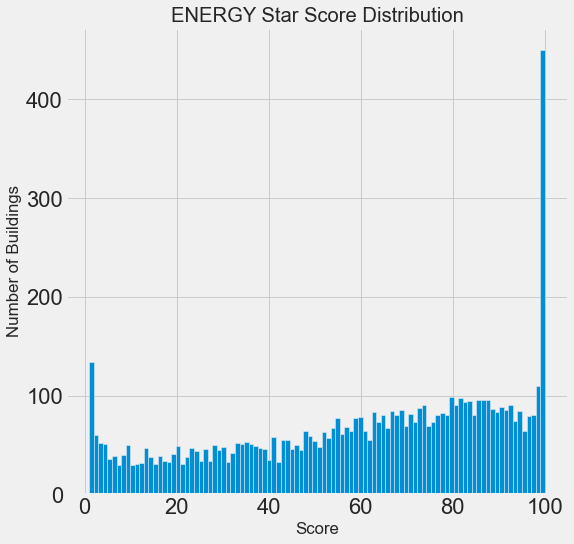

In [41]:
plt.figure(figsize=(8, 8))

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(train_labels['score'].dropna(), bins = 100)
plt.xlabel('Score'); plt.ylabel('Number of Buildings') 
plt.title('ENERGY Star Score Distribution')


##  <a name="5">5. Сравнение и выбор модели машинного обучения.

Цель состоит в том, чтобы определить, какая модель наиболее перспективна для дальнейшего использования (например, для настройки гиперпараметров).

Мы сравниваем модели, используя среднюю абсолютную ошибку. Базовая модель, которая угадывала медианное значение оценки, отличалась в среднем на 25 баллов.

__Заполняем отсутствующие значения__

При очистке данных мы отбросили колонки, в которых не хватает больше половины значений, у нас ещё отсутствует немало значений. Модели машинного обучения не могут работать с отсутствующими данными, поэтому нам нужно их заполнить.

Мы воспользуемся методом медианного заполнения (median imputation), который заменяет отсутствующие данные средним значениями по соответствующим колонкам.

В нижеприведённом коде мы создадим Scikit-Learn-объект Imputer с медианной стратегией. Затем обучим его на обучающих данных (с помощью imputer.fit), и применим для заполнения отсутствующих значений в обучающем и тестовом наборах (с помощью imputer.transform). То есть записи, которых не хватает в тестовых данных, будут заполняться соответствующим медианным значением из обучающих данных.


In [42]:
# Imputing missing values and scaling values
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import MinMaxScaler

# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Train on the training features
imputer.fit(train_features)

# Transform both training data and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

In [43]:
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


In [44]:
# Make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


Мы делаем заполнение и не обучаем модель на данных как есть, чтобы избежать проблемы с утечкой тестовых данных, когда информация из тестового датасета переходит в обучающий.
Теперь все значения заполнены, пропусков нет.

__Масштабирование__

Чтобы не было искажения результатов алгоритмов, т.к. признаки измеряются в разных единицах, а значит покрывают разные диапазоны, проведем масштабирование

In [45]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [46]:
# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

Теперь у каждого признака минимальное значение равно 0, а максимальное 1.

__Реализуем в Scikit-Learn модели машинного обучения__

Мы будем оценивать пять моделей разной степени сложности:

- Линейная регрессия.
- Метод k-ближайших соседей.
- «Случайный лес».
- Градиентный бустинг (Gradient Boosted Regression).
- Метод опорных векторов.

In [47]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [48]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Производительность линейной регрессии на тестовом наборе: MAE = %0.4f' % lr_mae)

Производительность линейной регрессии на тестовом наборе: MAE = 13.4116


In [49]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Производительность Метода опорных векторов: MAE = %0.4f' % svm_mae)

Производительность Метода опорных векторов: MAE = 10.8760


In [50]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Производительность метода "Случайный лес" на тестовом наборе: MAE = %0.4f' % random_forest_mae)

Производительность метода "Случайный лес" на тестовом наборе: MAE = 9.5219


In [51]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Производительность метода Градиентный бустинг на тестовом наборе: MAE = %0.4f' % gradient_boosted_mae)

Производительность метода Градиентный бустинг на тестовом наборе: MAE = 10.0230


In [52]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('Производительность Метода k-ближайших соседей на тестовом наборе: MAE = %0.4f' % knn_mae)

Производительность Метода k-ближайших соседей на тестовом наборе: MAE = 14.1710


<Figure size 720x720 with 0 Axes>

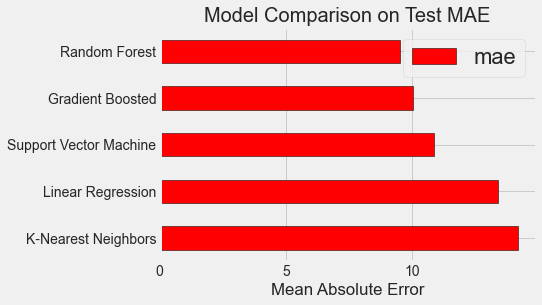

In [53]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

Чтобы объективно оценивать модели, мы с помощью медианного значения цели вычислили базовый уровень. А полученные результаты оказались значительно лучше, так что нашу задачу можно решить с помощью машинного обучения.

В нашем случае градиентный бустинг оказался чуть хуже «случайного леса». Хотя эти результаты нельзя считать абсолютно честными, потому что для гиперпараметров мы по большей части используем значения по умолчанию. Эффективность моделей сильно зависит от этих настроек, особенно в методе опорных векторов. Тем не менее на основании этих результатов мы выберем градиентный бустинг и станем его оптимизировать.

##  <a name="6">6. Гиперпараметрическая оптимизация модели

Поиск наилучшего набора гиперпараметров для конкретной задачи.

Мы будем оптимизировать:
- loss: минимизация функции потерь;
- n_estimators: количество используемых слабых деревьев решений (decision trees);
- max_depth: максимальная глубина каждого дерева решений;
- min_samples_leaf: минимальное количество примеров, которые должны быть в «листовом» (leaf) узле дерева решений;
- min_samples_split: минимальное количество примеров, которые нужны для разделения узла дерева решений;
- max_features: максимальное количество признаков, которые используются для разделения узлов.

В этом коде мы создаём сетку из гиперпараметров, затем создаём объект RandomizedSearchCV и ищем с помощью 4-блочной перекрёстной проверки по 25 разным комбинациям гиперпараметров:

In [54]:
# Loss function to be optimized
loss = ['ls', 'absolute_error', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

Мы выбрали 6 различных гиперпараметров для настройки.

В приведенном ниже коде мы создаем объект случайного поиска, передавая следующие параметры:

- estimator: модель
- param_distributions: распределение параметров, которое мы определили
- cv количество кратностей, используемых для кросс-валидации
- n_iter: количество различных комбинаций, которые нужно попробовать
- estimator: какую метрику использовать при оценке кандидатов
- n_jobs: количество ядер для параллельного запуска (-1 будет использовать все доступные)
- verbose: сколько информации отображать (1 отображает ограниченное количество)
- return_train_score: возвращает оценку обучения для каждой складки перекрестной проверки.
- random_state: исправляет используемый генератор случайных чисел, поэтому мы получаем одинаковые результаты при каждом запуске.

После обучения мы можем сравнить все различные комбинации гиперпараметров и найти наиболее эффективную.

In [55]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [56]:
# Fit on the training data
random_cv.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'loss': ['ls', 'absolute_error',
                                                 'huber'],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

Scikit-learn использует отрицательную среднюю абсолютную ошибку для оценки, чтобы показатель был максимальным. Следовательно, лучшая оценка будет ближе к 0. Мы можем получить результаты случайного поиска в наборе данных и отсортировать значения по производительности.

In [57]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
12      21.557596      0.817717         0.019532        0.006767   
3       19.587506      0.290364         0.019534        0.006765   
0        3.263963      0.143588         0.004516        0.004575   
9       14.416266      0.306843         0.011719        0.006766   
10     105.895785      2.249413         0.093755        0.000002   
7       13.098870      0.417221         0.015626        0.000001   
19      29.823886      0.717080         0.019533        0.006766   
13      15.168405      0.196151         0.042971        0.012954   
2       56.513392      2.024393         0.047441        0.005686   
21       6.208768      0.197522         0.027346        0.006767   

   param_n_estimators param_min_samples_split param_min_samples_leaf  \
12                500                       6                      6   
3                 500                       6                      8   
0                 100                       2                      6   
9                 500                       4                      2   
10               1100                      10                      6   
7                 500                       4                      6   
19               1100                       6                      2   
13               1500                      10                      1   
2                 500                       4                      2   
21                500                       6                      4   

   param_max_features param_max_depth      param_loss  \
12               None               5  absolute_error   
3                None               5           huber   
0                auto               5              ls   
9                auto               3           huber   
10               None              10           huber   
7                auto               3              ls   
19               auto               3  absolute_error   
13               sqrt               5  absolute_error   
2                auto              10           huber   
21               log2               5           huber   

                                               params  split0_test_score  \
12  {'n_estimators': 500, 'min_samples_split': 6, ...          -8.810724   
3   {'n_estimators': 500, 'min_samples_split': 6, ...          -8.947546   
0   {'n_estimators': 100, 'min_samples_split': 2, ...          -9.097658   
9   {'n_estimators': 500, 'min_samples_split': 4, ...          -9.025534   
10  {'n_estimators': 1100, 'min_samples_split': 10...          -9.165007   
7   {'n_estimators': 500, 'min_samples_split': 4, ...          -9.224570   
19  {'n_estimators': 1100, 'min_samples_split': 6,...          -9.275729   
13  {'n_estimators': 1500, 'min_samples_split': 10...          -9.364021   
2   {'n_estimators': 500, 'min_samples_split': 4, ...          -9.413839   
21  {'n_estimators': 500, 'min_samples_split': 6, ...          -9.335305   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
12          -8.737835          -9.335435          -9.001258        -8.971313   
3           -8.904320          -9.373665          -9.065842        -9.072844   
0           -9.002420          -9.482243          -9.217129        -9.199863   
9           -9.054534          -9.516208          -9.327432        -9.230927   
10          -9.207952          -9.567240          -9.454990        -9.348797   
7           -9.174527          -9.648206          -9.401172        -9.362119   
19          -9.268304          -9.597162          -9.393641        -9.383709   
13          -9.210376          -9.627035          -9.344128        -9.386390   
2           -9.263612          -9.673655          -9.271973        -9.405770   
21          -9.209090          -9.663910          -9.426719        -9.408756   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
12        0.231183                1  

In [58]:
random_cv.best_estimator_

GradientBoostingRegressor(loss='absolute_error', max_depth=5,
                          min_samples_leaf=6, min_samples_split=6,
                          n_estimators=500, random_state=42)

Лучшая модель Градиентный бустинг имеет следующие гиперпараметры:
- loss = absolute_error
- n_estimators = 500
- max_depth = 5
- min_samples_leaf = 6
- min_samples_split = 6
- max_features = None


Мы будем использовать поиск по сетке, которая имеет только гиперпараметр n_estimators.
Мы оценим ряд деревьев, а затем построим график обучения и тестирования, чтобы понять, что увеличение количества деревьев делает для нашей модели. Мы зафиксируем другие гиперпараметры на лучших значениях, возвращенных случайным поиском.

In [59]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = GradientBoostingRegressor(loss = 'absolute_error', max_depth = 5,
                                  min_samples_leaf = 6,
                                  min_samples_split = 6,
                                  max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [60]:
# Fit the grid search
grid_search.fit(X, y)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


GridSearchCV(cv=4,
             estimator=GradientBoostingRegressor(loss='absolute_error',
                                                 max_depth=5,
                                                 min_samples_leaf=6,
                                                 min_samples_split=6,
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600, 650, 700, 750,
                                          800]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Text(0.5, 1.0, 'Performance vs Number of Trees')

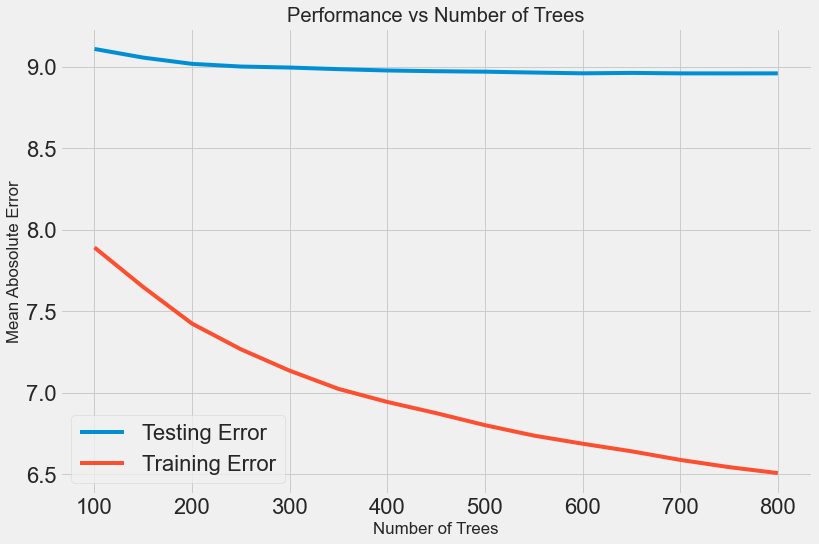

In [61]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees')

In [62]:
results.sort_values('mean_test_score', ascending = False).head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
13      32.368530      0.287849         0.027345        0.006767   
12      29.538316      0.494946         0.023439        0.007813   
14      32.172225      1.973044         0.016318        0.000986   
10      25.571702      0.365403         0.019532        0.006766   
11      27.967111      0.533799         0.027345        0.006767   

   param_n_estimators                 params  split0_test_score  \
13                750  {'n_estimators': 750}          -8.783690   
12                700  {'n_estimators': 700}          -8.787656   
14                800  {'n_estimators': 800}          -8.785110   
10                600  {'n_estimators': 600}          -8.795635   
11                650  {'n_estimators': 650}          -8.795559   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
13          -8.739754          -9.327527          -8.991730        -8.960675   
12          -8.738181          -9.330541          -8.987307        -8.960921   
14          -8.733598          -9.331876          -8.993294        -8.960969   
10          -8.733039          -9.330514          -8.985887        -8.961269   
11          -8.741465          -9.330478          -8.987683        -8.963796   

    std_test_score  rank_test_score  split0_train_score  split1_train_score  \
13        0.232204                1           -6.739835           -6.565678   
12        0.232889                2           -6.787371           -6.589929   
14        0.235181                3           -6.696559           -6.536099   
10        0.232633                4           -6.869366           -6.690064   
11        0.230630                5           -6.836130           -6.621463   

    split2_train_score  split3_train_score  mean_train_score  std_train_score  
13           -6.473764           -6.392939         -6.543054         0.129006  
12           -6.531718           -6.440549         -6.587392         0.127142  
14           -6.449652           -6.343348         -6.506415         0.129276  
10           -6.619653           -6.568125         -6.686802         0.113945  
11           -6.585288           -6.518856         -6.640434         0.118827

С ростом количества используемых моделью деревьев снижается уровень ошибок в ходе обучения и тестирования. Но ошибки при обучении снижаются куда быстрее, и в результате модель переобучается: показывает отличные результаты на обучающих данных, но на тестовых работает хуже.

Для нашей финальной модели мы возьмём 800 оценщиков, потому что это даст нам самый низкий уровень ошибки при перекрёстной проверке.

##  <a name="7">7. Оценка модели на тестовом наборе данных.

Модель не получала доступ к тестовым данным в ходе обучения. Поэтому точность при работе с тестовыми данными мы можем использовать в роли индикатора качества модели, когда её допустят к реальным задачам.

In [63]:
# Default model
default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

GradientBoostingRegressor(loss='absolute_error', max_depth=5,
                          min_samples_leaf=6, min_samples_split=6,
                          n_estimators=750, random_state=42)

Измерим длительность работы модели по умолчанию:

In [64]:
%%timeit -n 1 -r 5
default_model.fit(X, y)

1.95 s ± 38.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [65]:
%%timeit -n 1 -r 5
final_model.fit(X, y)

26.7 s ± 95 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


В нашем случае 14-кратное увеличение длительности работы в относительном выражении велико, но в абсолютном — незначительно.

In [66]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 10.0256.
Final model performance on the test set:   MAE = 9.0647.


Гиперпараметрическая настройка помогла улучшить точность модели примерно на 10 %. В зависимости от ситуации это может быть значительное улучшение.

Мы получили финальные результаты прогнозирования, теперь их проанализируем и выясним, есть ли какие-то заметные отклонения.
Построим график плотности прогнозных и реальных значений.

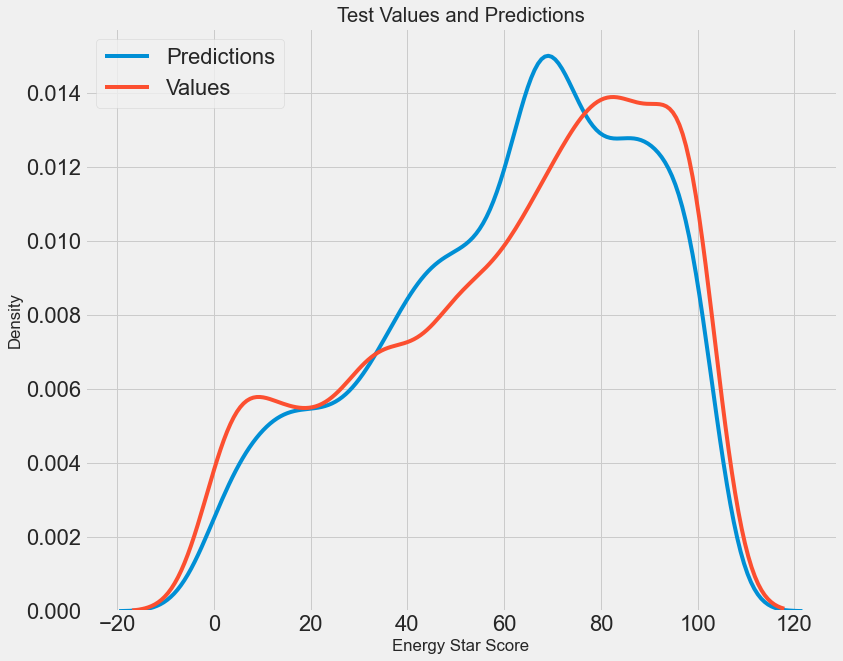

In [67]:
f, ax = plt.subplots(figsize=(12, 10))

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.legend()
plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

Прогноз модели неплохо повторяет распределение реальных значений, при этом на обучающих данных пик плотности расположен ближе к медианному значению, чем к реальному пику плотности (около 100). 

Построим гистограмму погрешности

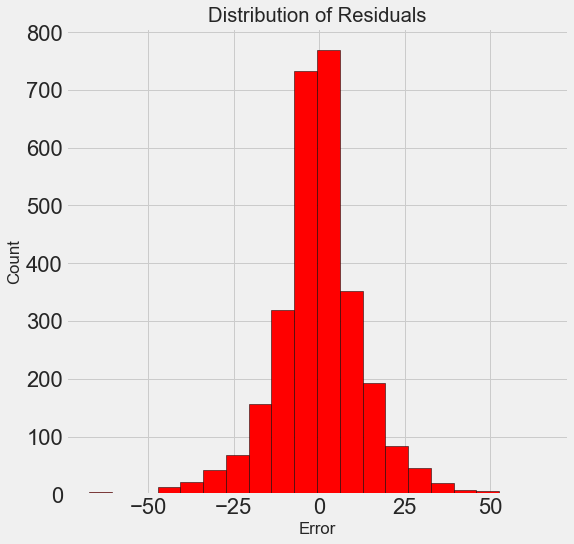

In [68]:
plt.figure(figsize=(8, 8))

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

Погрешности имеют почти нормальное распределение, хотя есть несколько больших отрицательных значений.

 С помощью градиентного бустинга удалось на тестовых данных добиться погрешности в пределах 9,1. Гиперпараметрическая настройка может сильно улучшить результаты, но ценой значительного замедления работы.

__Создание окончательной модели__

In [69]:
# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Train on the training features
imputer.fit(train_features)

# Transform both training data and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

# Sklearn wants the labels as one-dimensional vectors
y = np.array(train_labels).reshape((-1,))
y_test = np.array(test_labels).reshape((-1,))

In [70]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [71]:
model = GradientBoostingRegressor(loss='absolute_error', max_depth=5, max_features=None,
                                  min_samples_leaf=6, min_samples_split=6, 
                                  n_estimators=800, random_state=42)

model.fit(X, y)

GradientBoostingRegressor(loss='absolute_error', max_depth=5,
                          min_samples_leaf=6, min_samples_split=6,
                          n_estimators=800, random_state=42)

In [72]:
#  Make predictions on the test set
model_pred = model.predict(X_test)

print('Final Model Performance on the test set: MAE = %0.4f' % mae(y_test, model_pred))

Final Model Performance on the test set: MAE = 9.0603


##  <a name="8">8. Интерпретирование результатов работы модели

Регрессия на основе градиентного бустинга располагается примерно посередине шкалы интерпретируемости моделей: сама модель сложная, но состоит из сотен довольно простых деревьев решений. 
Чтобы разообраться в работе нашей модели можно воспользоваться следующими способами:
- Оценить важности признаков.
- Применить метод LIME — Local Interpretable Model-Agnostic Explainations, локальные интерпретируемые моделезависимые объяснения.

В приведённом ниже коде model — наша обученная модель, и с помощью model.feature_importances_ можно определить важности признаков.

In [73]:
# model is the trained model
importances = model.feature_importances_

# train_features is the dataframe of training features
feature_list = list(train_features.columns)

# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)

feature_results.head(10)

feature  importance
0                                Site EUI (kBtu/ft²)    0.473477
1  Weather Normalized Site Electricity Intensity ...    0.155045
2                                        Property Id    0.038084
3      Water Intensity (All Water Sources) (gal/ft²)    0.036457
4                               DOF Gross Floor Area    0.034904
5        log_Direct GHG Emissions (Metric Tons CO2e)    0.034427
6  Largest Property Use Type_Non-Refrigerated War...    0.030557
7  log_Water Intensity (All Water Sources) (gal/ft²)    0.028921
8      Largest Property Use Type_Multifamily Housing    0.027457
9                                         Year Built    0.024513

Построим график важности функций для визуального сравнения.

<Figure size 864x720 with 0 Axes>

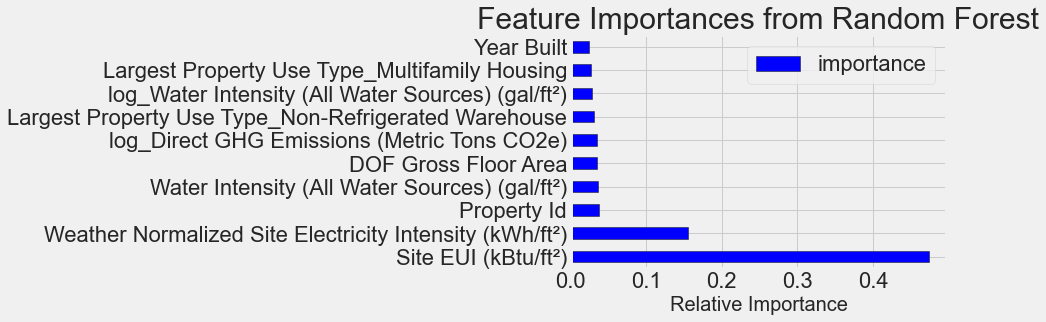

In [74]:
plt.figure(figsize=(12, 10))
plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 30);

Самые важные признаки — Site EUI (интенсивность потребления энергии) и Weather Normalized Site Electricity Intensity, на них приходится больше 66 % суммарной важности. Уже у третьего признака важность сильно падает, это может говорить о том, что нам не нужно использовать все признаки для достижения высокой точности прогнозирования.

На основе этих результатов можно наконец-то ответить на один из исходных вопросов: самыми важными индикаторами количества баллов Energy Star Score являются Site EUI и Weather Normalized Site Electricity Intensity.


Используем только 10 наиболее важных функций линейной регрессии, чтобы увидеть, улучшится ли производительность.

In [75]:
# Extract the names of the most important features
most_important_features = feature_results['feature'][:10]

# Find the index that corresponds to each feature name
indices = [list(train_features.columns).index(x) for x in most_important_features]

# Keep only the most important features
X_reduced = X[:, indices]
X_test_reduced = X_test[:, indices]

print('Most important training features shape: ', X_reduced.shape)
print('Most important testing  features shape: ', X_test_reduced.shape)

Most important training features shape:  (6622, 10)
Most important testing  features shape:  (2839, 10)


In [76]:
lr = LinearRegression()

# Fit on full set of features
lr.fit(X, y)
lr_full_pred = lr.predict(X_test)

# Fit on reduced set of features
lr.fit(X_reduced, y)
lr_reduced_pred = lr.predict(X_test_reduced)

# Display results
print('Linear Regression Full Results: MAE =    %0.4f.' % mae(y_test, lr_full_pred))
print('Linear Regression Reduced Results: MAE = %0.4f.' % mae(y_test, lr_reduced_pred))

Linear Regression Full Results: MAE =    13.4116.
Linear Regression Reduced Results: MAE = 14.3493.


In [77]:
# Create the model with the same hyperparamters
model_reduced = GradientBoostingRegressor(loss='absolute_error', max_depth=5, max_features=None,
                                  min_samples_leaf=6, min_samples_split=6, 
                                  n_estimators=800, random_state=42)

# Fit and test on the reduced set of features
model_reduced.fit(X_reduced, y)
model_reduced_pred = model_reduced.predict(X_test_reduced)

print('Gradient Boosted Reduced Results: MAE = %0.4f' % mae(y_test, model_reduced_pred))

Gradient Boosted Reduced Results: MAE = 9.5543


Уменьшение признаков не улучшило результаты линейной регрессии. Оказывается, дополнительная информация в функциях с низкой важностью действительно повышает производительность.

__Локальные интерпретируемые моделезависимые объяснения (LIME)__

Мы воспользуемся методом LIME, чтобы изучить совершенно ошибочный прогноз нашей модели и понять, почему она ошибается.
Мы рассмотрим попытку объяснить прогнозы на примере, когда модель ошибается, и на примере, когда модель работает правильно. Мы ограничимся использованием сокращенного набора из 10 признаков, чтобы упростить интерпретацию.

In [78]:
# Find the residuals
residuals = abs(model_reduced_pred - y_test)
    
# Exact the worst and best prediction
wrong = X_test_reduced[np.argmax(residuals), :]
right = X_test_reduced[np.argmin(residuals), :]

In [79]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [80]:
import lime
import lime.lime_tabular

In [81]:
# Create a lime explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(training_data = X_reduced, 
                                                   mode = 'regression',
                                                   training_labels = y,
                                                   feature_names = list(most_important_features))

In [82]:
# Display the predictedand true value for the wrong instance
print('Prediction: %0.4f' % model_reduced.predict(wrong.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmax(residuals)])

Prediction: 12.0742
Actual Value: 96.0000


Text(0.5, 0, 'Effect on Prediction')

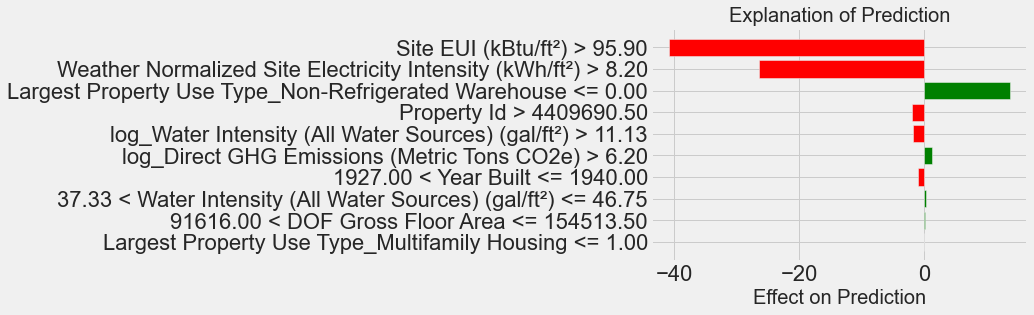

In [83]:
# Explanation for wrong prediction
wrong_exp = explainer.explain_instance(data_row = wrong, 
                                       predict_fn = model_reduced.predict)

# Plot the prediction explaination
wrong_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 20);
plt.xlabel('Effect on Prediction', size = 20)

Интерпритация диаграммы: каждая запись по оси Y обозначает одно значение переменной, а красные и зелёные полосы отражают влияние этого значения на прогноз. Например, согласно верхней записи влияние Site EUI больше 95,90, в результате из прогноза вычитается около 40 пунктов. Согласно второй записи влияние Weather Normalized Site Electricity Intensity меньше 3,80, и поэтому к прогнозу прибавляется около 10 пунктов. Итоговый прогноз представляет собой сумму интерсепта и влияний каждого из перечисленных значений.

Давайте посмотрим на это с другой стороны:

In [84]:
wrong_exp.show_in_notebook(show_predicted_value=False)

Слева показан процесс принятия решения моделью: визуально отображено влияние на прогноз каждой переменной. В таблице справа приведены фактические значения переменных для заданного измерения.

В данном случае модель спрогнозировала около 12 баллов, а фактическое значение составило 96.
Это результат расчёта на основе конкретных значений. Значение Site EUI было относительно высоким и можно было ожидать низкого балла Energy Star Score (потому что на него сильно влияет EUI), что наша модель и сделала. Но в данном случае эта логика оказалась ошибочной, потому что по факту здание получило наивысший балл Energy Star Score — 100.

Теперь мы можем пройти тот же процесс с предсказанием, которое модель получила правильно.

Prediction: 97.0030
Actual Value: 97.0000


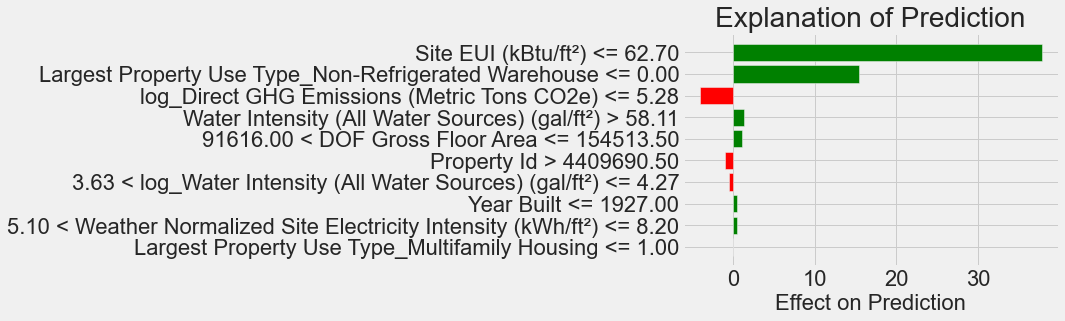

In [85]:
# Display the predicted and true value for the wrong instance
print('Prediction: %0.4f' % model_reduced.predict(right.reshape(1, -1)))
print('Actual Value: %0.4f' % y_test[np.argmin(residuals)])

# Explanation for wrong prediction
right_exp = explainer.explain_instance(right, model_reduced.predict, num_features=10)
right_exp.as_pyplot_figure();
plt.title('Explanation of Prediction', size = 28);
plt.xlabel('Effect on Prediction', size = 22);

In [86]:
right_exp.show_in_notebook(show_predicted_value=False)

Модель Градиентный бустинг дала правильный результат.

##  <a name="9">9. Выводы

Учитывая проведенное исследование, можно сделать вывод, что, используя данные об энергопотреблении здания, модель машинного обучения может предсказать оценку Energy Star Score здания с точностью до 10 баллов.
Наиболее важными переменными для определения оценки Energy Star Score являются интенсивность использования электроэнергии и интенсивность использования воды.

Основные моменты из отчета:
1. Баллы Energy Star завышены: непропорциональный глобальный максимум равен 100, а вторичный максимум 1.
2. Офисы, общежития и неохлаждаемые склады имеют более высокие баллы энергетических показателей, чем сообщества по уходу за престарелыми, отели и многоквартирные дома.
3. Интенсивность использования энергии на объекте и использование природного газа отрицательно коррелирует с показателем Energy Star Score.
4. Метод "Градиентный бустинг" смог получить среднюю абсолютную ошибку в 10 баллов.
5. При наличии данных для нового здания обученная модель может точно определить баллы Energy Star Score.

